#ANN


Classification

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification, make_regression

In [2]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [3]:
import sklearn
dir(sklearn.datasets)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_base',
 '_california_housing',
 '_covtype',
 '_kddcup99',
 '_lfw',
 '_olivetti_faces',
 '_openml',
 '_rcv1',
 '_samples_generator',
 '_species_distributions',
 '_svmlight_format_fast',
 '_svmlight_format_io',
 '_twenty_newsgroups',
 'clear_data_home',
 'dump_svmlight_file',
 'fetch_20newsgroups',
 'fetch_20newsgroups_vectorized',
 'fetch_california_housing',
 'fetch_covtype',
 'fetch_kddcup99',
 'fetch_lfw_pairs',
 'fetch_lfw_people',
 'fetch_olivetti_faces',
 'fetch_openml',
 'fetch_rcv1',
 'fetch_species_distributions',
 'get_data_home',
 'load_boston',
 'load_breast_cancer',
 'load_diabetes',
 'load_digits',
 'load_files',
 'load_iris',
 'load_linnerud',
 'load_sample_image',
 'load_sample_images',
 'load_svmlight_file',
 'load_svmlight_files',
 'load_wine',
 'make_biclusters',
 'make_blobs',
 'make_checkerboard',
 'make_circles',
 'make_class

In [4]:
data=make_classification(200,4,random_state=1)

In [5]:
data

(array([[-1.23576237, -1.7214542 , -3.99795241, -3.76108113],
        [-0.16252468,  0.35493385,  1.66600182,  0.92668235],
        [ 0.72073196,  0.37858444, -0.02628244,  0.66446274],
        [-0.76797979,  0.39237193,  3.02830588,  1.23760008],
        [-0.99210893, -0.90016723, -1.39289123, -1.84136967],
        [ 0.36542983,  0.53432653,  1.27752461,  1.17398502],
        [-0.83562206, -0.4356379 ,  0.04289799, -0.76232518],
        [-0.86999541, -0.5273709 , -0.23363384, -0.97415194],
        [ 2.26045432,  1.26940354,  0.22687374,  2.28455161],
        [-1.25535155, -0.35062424,  1.20998289, -0.40238479],
        [ 2.02469979,  1.12172397,  0.14557597,  2.00890835],
        [ 0.44189723, -0.3132748 , -2.07240591, -0.92605777],
        [ 1.03140102,  0.50712985, -0.16822223,  0.86617918],
        [-0.4475535 ,  0.07587464,  1.18874683,  0.34767793],
        [-0.09465562, -0.87905057, -3.12336264, -2.11492871],
        [-1.22419352, -1.1822922 , -1.98848905, -2.4470538 ],
        

In [6]:
x=data[0]
y=data[1]

In [7]:
model=Sequential()
model.add(Dense(115,activation='tanh',input_dim=4))
model.add(Dense(64,activation='relu'))
model.add(Dense(114,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [8]:
adam=Adam(0.001)
model.compile(optimizer=adam, loss='binary_crossentropy',metrics=['accuracy'])

In [9]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 115)               575       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                7424      
_________________________________________________________________
dense_2 (Dense)              (None, 114)               7410      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 115       
Total params: 15,524
Trainable params: 15,524
Non-trainable params: 0
_________________________________________________________________
None


Epoch 1/200
32/32 [==============================] - 1s 7ms/step - loss: 0.5504 - accuracy: 0.7937 - val_loss: 0.4239 - val_accuracy: 0.8500
Epoch 2/200
32/32 [==============================] - 0s 2ms/step - loss: 0.3666 - accuracy: 0.8750 - val_loss: 0.2781 - val_accuracy: 0.9250
Epoch 3/200
32/32 [==============================] - 0s 3ms/step - loss: 0.3427 - accuracy: 0.8500 - val_loss: 0.2419 - val_accuracy: 0.9250
Epoch 4/200
32/32 [==============================] - 0s 2ms/step - loss: 0.3385 - accuracy: 0.8625 - val_loss: 0.2374 - val_accuracy: 0.9250
Epoch 5/200
32/32 [==============================] - 0s 2ms/step - loss: 0.3146 - accuracy: 0.8750 - val_loss: 0.2365 - val_accuracy: 0.9500
Epoch 6/200
32/32 [==============================] - 0s 2ms/step - loss: 0.3116 - accuracy: 0.8813 - val_loss: 0.2349 - val_accuracy: 0.9500
Epoch 7/200
32/32 [==============================] - 0s 3ms/step - loss: 0.3033 - accuracy: 0.8938 - val_loss: 0.2300 - val_accuracy: 0.9500
Epoch 8/200
3

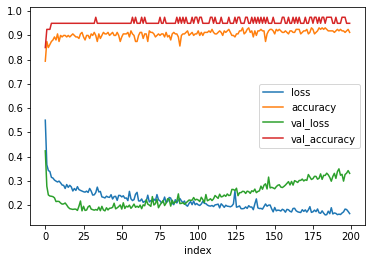

In [10]:
history=model.fit(x,y,epochs=200,batch_size=5,validation_split=0.2)
pd.DataFrame(model.history.history).reset_index().plot('index',kind='line')

Regression


In [11]:
data=make_regression(200,4,random_state=1)


In [12]:
x=data[0]
y=data[1]

In [13]:
from keras import backend as K

In [14]:
def r2(y_true,y_pred):
  SS_res=K.sum(K.square(y_true-y_pred))
  SS_tot=K.sum(K.square(y_true-K.mean(y_true)))
  return(1-SS_res/(SS_tot))

In [15]:
model=Sequential()
model.add(Dense(12,activation='tanh',input_dim=4))
model.add(Dense(8,activation='relu'))
model.add(Dense(4))
model.add(Dense(1))

In [16]:
adam=Adam(0.0001)

In [17]:
model.compile(optimizer=adam,loss='mean_squared_error',metrics=[r2])

In [18]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 12)                60        
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 5         
Total params: 205
Trainable params: 205
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history=model.fit(x,y,epochs=150,batch_size=5,validation_split=0.2)

Epoch 1/150
32/32 [==============================] - 1s 5ms/step - loss: 11218.4092 - r2: -0.5237 - val_loss: 15516.8223 - val_r2: -0.1612
Epoch 2/150
32/32 [==============================] - 0s 2ms/step - loss: 11216.4854 - r2: -0.5685 - val_loss: 15514.4971 - val_r2: -0.1611
Epoch 3/150
32/32 [==============================] - 0s 2ms/step - loss: 11214.4785 - r2: -0.4245 - val_loss: 15512.2715 - val_r2: -0.1609
Epoch 4/150
32/32 [==============================] - 0s 2ms/step - loss: 11212.4541 - r2: -0.7605 - val_loss: 15510.0342 - val_r2: -0.1608
Epoch 5/150
32/32 [==============================] - 0s 3ms/step - loss: 11210.4668 - r2: -0.6069 - val_loss: 15507.3691 - val_r2: -0.1606
Epoch 6/150
32/32 [==============================] - 0s 2ms/step - loss: 11208.2539 - r2: -0.6259 - val_loss: 15505.0234 - val_r2: -0.1604
Epoch 7/150
32/32 [==============================] - 0s 2ms/step - loss: 11206.0674 - r2: -0.2899 - val_loss: 15502.3721 - val_r2: -0.1602
Epoch 8/150
32/32 [========

In [ ]:
pd.DataFrame(model.history.history)[['r2','val_r2']].reset_index().plot('index',kind='line')

https://towardsdatascience.com/building-your-own-artificial-neural-network-from-scratch-on-churn-modeling-dataset-using-keras-in-690782f7d051